In [11]:
import math
import statistics
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def weight_init(n_input,n_hidden,n_output):
    """ H: hidden layer weights
        O: output layer wieghts"""
    global H,O
    np.random.seed(1)
    H= 2*np.random.rand(n_input,n_hidden)-1
    O= 2*np.random.rand(n_hidden,n_output)-1
    #H=np.array([[0.15, 0.2],[0.25,0.3]])
    #O=np.array([[0.4,0.45],[0.5,0.55]])
    print("---initialising hidden and outout neurons---")
    print('hidden layer',H,'\n','output layer',O)
    print("-----------------------------")
    return O,H

In [13]:
def sigmoid(x):
    """Sigmoid function"""
    return 1/(1+np.exp(-x))

In [14]:
def net(l1,l2,b):
    """Calculates net input"""
    return(np.dot(l1,l2)+b)

In [15]:
def error(target,output):
    """error function"""
    return(np.sum(0.5*(target-output)**2))

In [16]:
def sigmoid_derivative(x):
    """derivative of sigmoid function"""
    return x*(1-x)

In [17]:
def delta(x):
    """derivative of the error function"""
    return(-(target_outputs-x))

def finderror():
    """total error"""
    E_total=error(target_outputs,out_o)
    print('etotal',E_total)
    return E_total

In [23]:
def forwardpropogation(inputs,H,O):
    #print(inputs.shape,H.shape)
    net_h=net(inputs,H,b1) #net input to hidden layer
    out_h=sigmoid(net_h) #net input is squashed using sigmoid function
    net_o=net(out_h,O,b2) #net input to output layer
    out_o=sigmoid(net_o) #net input squashed by sigmoid function
    #print('out_h \n',out_h)
    #print('out_o \n',out_o)
    return out_h,out_o
    

In [24]:
def backpropogation(out_h,out_o,O,H):
    
    #----updating output layer weights----
    adjust=delta(out_o)*sigmoid_derivative(out_o)*out_h
    #print('adjustment output weights=',adjust)
    x=O-L*adjust
    O=x #update of output layer weights
    #print('OUTPUT WEIGHTS:',O)
    
    
    #----updating hidden layer wieghts----
    
    x=np.sum(((delta(out_h))*H))
    adjust=np.multiply(x,sigmoid_derivative(out_h)*inputs.T)
    #print('adjustment hidden weights=',adjust)
    y=H-L*adjust
    H=y #update of hidden layer weights
    #print('HIDDEN WEIGHTS:',H)
    return H,O


In [30]:
if __name__ == "__main__":
    O,H=weight_init(2,2,2)
    inputs=np.array([[0.05,0.10]])
    target_outputs=[[0.01,0.99]]
    b1,b2=0.35,0.60
    L=0.5
    history=[]


    i=0
    while(i<1000):
        out_h,out_o=forwardpropogation(inputs,H,O)
        errors=error(target_outputs,out_o)
        if i%100==0:
            print(i,'ERROR',errors)
        history.append(errors)
        H,O=backpropogation(out_h,out_o,O,H)
        i=i+1


---initialising hidden and outout neurons---
hidden layer [[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]] 
 output layer [[-0.70648822 -0.81532281]
 [-0.62747958 -0.30887855]]
-----------------------------
0 ERROR 0.22573090797291626
100 ERROR 0.020400763552099535
200 ERROR 0.008131709644143996
300 ERROR 0.00468173059543402
400 ERROR 0.003183222751236027
500 ERROR 0.002377146456444143
600 ERROR 0.0018821244375229725
700 ERROR 0.0015493635042935568
800 ERROR 0.0013107555169611191
900 ERROR 0.0011313483532861632


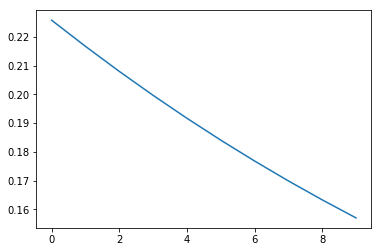

In [31]:
plt.plot(history[:10]) #upon 10 iterations

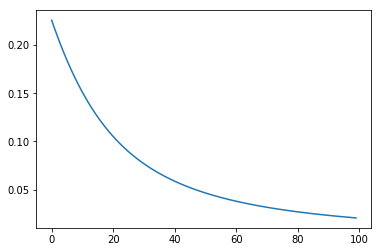

In [32]:
plt.plot(history[:100]) #upon 100 iterations

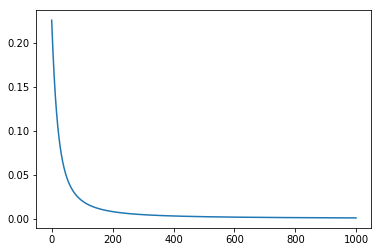

In [33]:
plt.plot(history) #upon 10000 iterations